# Почему Баяс такой наивный?

In [1]:
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/5notebooks/Lec_2/all_texts/mil_all.txt
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/5notebooks/Lec_2/all_texts/russianpost_all.txt
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/5notebooks/Lec_5/cyberlen__archi_sh.txt
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/5notebooks/Lec_5/cyberleninka_bio_0_9.txt

--2019-04-14 12:58:18--  https://raw.githubusercontent.com/semensorokin/NLP_projects/master/5notebooks/Lec_2/all_texts/mil_all.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3830863 (3.7M) [text/plain]
Saving to: ‘mil_all.txt.4’

mil_all.txt.4       100%[===================>]   3.65M  --.-KB/s    in 0.1s    

2019-04-14 12:58:19 (35.9 MB/s) - ‘mil_all.txt.4’ saved [3830863/3830863]

--2019-04-14 12:58:20--  https://raw.githubusercontent.com/semensorokin/NLP_projects/master/5notebooks/Lec_2/all_texts/russianpost_all.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awai

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
id_1 = '1q141QiymlA6lRXcFUNRR17xV82yztDPR'
id_2 = '1vdJUkBXDQZroNdofjJGgJR5iZM1dUU3e'
downloaded = drive.CreateFile({'id':id_1}) 
downloaded.GetContentFile('cyberlen_forest.txt')
downloaded = drive.CreateFile({'id':id_2}) 
downloaded.GetContentFile('cyberlen_archi.txt') 

In [0]:
import re

# Подключим данные и разобьем документ на статьи
cyber_forest_all = open('cyberlen_forest.txt', encoding = 'utf-8').read().split('\n=====\n')
cyber_archi_all = open('cyberlen_archi.txt', encoding = 'utf-8').read().split('\n=====\n')
cyber_bio_all = open('cyberleninka_bio_0_9.txt', encoding = 'utf-8').read().split('\n=====\n')
military = open('mil_all.txt', 'r').read().split('\n=============\n')
post = open('russianpost_all.txt', 'r').read().split('\n=============\n') 

In [0]:
#Нахождение уникальных слов и чистка текстов

def find_unique_words(texts):
    clear_texts = []
    words = []
    
    for article in texts:
        res = re.findall('[а-яА-ЯёЁ]+', article)
        clear_texts.append(' '.join(res))
        words.extend(res)
  
    return clear_texts, words

clear_military, military_words = find_unique_words(military)
clear_post, post_words = find_unique_words(post)
clear_forest, forest_words = find_unique_words(cyber_forest_all)
clear_archi, archi_words = find_unique_words(cyber_archi_all)
clear_bio, bio_words = find_unique_words(cyber_bio_all)


In [0]:
clear_forest, clear_archi = clear_forest[:2000], clear_archi[:2000]

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       317
           2       0.97      0.99      0.98       252

   micro avg       0.98      0.98      0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



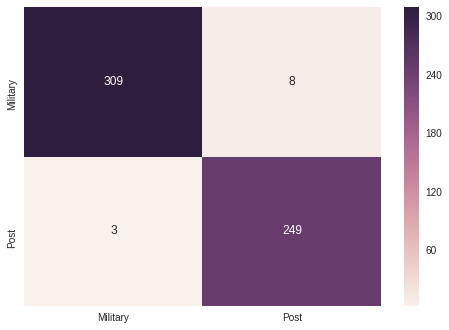

In [7]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns; sns.set()

#Сложим все данные в одну большую табличку
data = pd.DataFrame(np.array([clear_military+clear_post, [1 for i in range(len(clear_military))]+[2 for i in range(len(clear_post))]]).T, columns = ['Text', 'Label'])
#Разобьем табличку на тренировачные и тестовые данные 
text_trian, text_test, labels_train, labels_test =  train_test_split(data.Text, data.Label, test_size=0.1, random_state=42)

#Опишем нашу будущую модель.
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
#Обучим модель
text_clf.fit(text_trian, labels_train)
#Попросим нашу модель оценить еще не виденные тексты
predicted = text_clf.predict(text_test)

#Оценим результаты
print(metrics.classification_report(labels_test, predicted))
ax = sns.heatmap(metrics.confusion_matrix(labels_test, predicted), annot=True, fmt="d", xticklabels = ['Military', 'Post'], yticklabels = ['Military', 'Post'])

Пусть наша система обучалась на следующих текстах, заранее известных где одна тематика, а где вторая (обучающая выборка):

### Military:
<br>

«Начальник Главного оперативного управления Генерального штаба Вооруженных Сил РФ генерал полковник Сергей Рудской провел брифинг для СМИ» <br>
«Команды на всеармейских этапах конкурсов АрМИ Танковый биатлон и Суворовский натиск в Амурской области не только показывают свои умения управлять военной техникой но и состязаются в выполнении спортивных нормативов»<br>

### Post:
<br>
«Друзья сегодня мы хотим рассказать вам об упаковке отправлений этот вопрос нам задают очень часто»<br>
«Наша цель сделать почтовые отделения доступными для всех»<br>

### Задание: определить, к какой категории отнести следующее статья:

«В последнее время вышло много интересных марок конвертов и почтовых карточек »

### Решение: <br>

####<i>формула Баяса</i> <br>
$ P(c|d)=P(d|c)*P(c)/P(d) $

$ P(c|d) $ — вероятность что документ $d$ принадлежит классу $c$, именно её нам надо рассчитать;<br>
$ P(d|c) $ — вероятность встретить документ $d$ среди всех документов класса $c$; <br>
$ P(c) $ — безусловная вероятность встретить документ класса $c$ в корпусе документов; <br>
$ P(d) $ — безусловная вероятность документа $d$ в корпусе документов.<br> <br>


Составляем таблицу. Рассчитываем вероятности, параметр для сглаживания принимаем за единицу.
<br>

Слово | #  в Military | # в Post | p(X given Military) | p(X given Post)|  
--- | --- | --- | --- | ---
Начальник| 1 | 0 | 1/(9+4) | 0/(9+4)
полковник | 4 | 0 | 4/(9+4) | 0/(9+4)
биатлон | 1 | 0 | 1/(9+4) | 0/(9+4)
показывают | 1 | 2 |   1/(9+4) |  2/(9+4)
почтовые | 0 | 1 | 0/(9+4) | 1/(9+4) 
отделения | 0 | 1 | 0/(9+4) | 1/(9+4) 
вопрос | 0 | 1 |  0/(9+4) | 1/(9+4) 
цель | 0 | 1 |  0/(9+4) | 1/(9+4) 

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       422
           2       1.00      0.98      0.99       378

   micro avg       0.99      0.99      0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



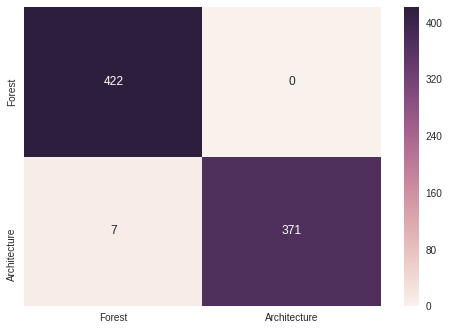

In [8]:
data_bio_archi = pd.DataFrame(np.array([clear_forest+clear_archi, [1 for i in range(len(clear_forest))]+[2 for i in range(len(clear_archi))]]).T, columns = ['Text', 'Label'])
text_trian, text_test, labels_train, labels_test =  train_test_split(data_bio_archi.Text, data_bio_archi.Label, test_size=0.2, random_state=42)
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf.fit(text_trian, labels_train)
predicted = text_clf.predict(text_test)
print(metrics.classification_report(labels_test, predicted))
ax = sns.heatmap(metrics.confusion_matrix(labels_test, predicted), annot=True, fmt="d", xticklabels = ['Forest', 'Architecture'], yticklabels = ['Forest', 'Architecture'])

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        41
           2       0.91      1.00      0.95       400

   micro avg       0.91      0.91      0.91       441
   macro avg       0.45      0.50      0.48       441
weighted avg       0.82      0.91      0.86       441



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


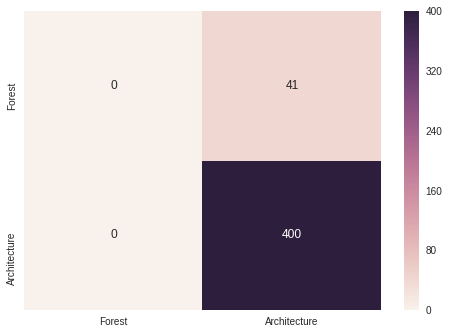

In [9]:
data_bio_archi = pd.DataFrame(np.array([clear_bio+clear_archi, [1 for i in range(len(clear_bio))]+[2 for i in range(len(clear_archi))]]).T, columns = ['Text', 'Label'])
text_trian, text_test, labels_train, labels_test =  train_test_split(data_bio_archi.Text, data_bio_archi.Label, test_size=0.2, random_state=42)
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf.fit(text_trian, labels_train)
predicted = text_clf.predict(text_test)
print(metrics.classification_report(labels_test, predicted))
ax = sns.heatmap(metrics.confusion_matrix(labels_test, predicted), annot=True, fmt="d", xticklabels = ['Forest', 'Architecture'], yticklabels = ['Forest', 'Architecture'])